Neste estudo, o FK tentou entender outras coisas / nuances do dataset.

Não chegou a lugar nenhum

In [175]:
import pandas as pd
import numpy as np

import logging
log = logging.getLogger(__name__)
logging.basicConfig(level=logging.DEBUG) 

# DataCollect

In [84]:
#SELECT * FROM `sz-vision-prod.vision.foex_pulp_china` order by DATE
df_master = pd.read_csv("pix.csv")
print(df_master.shape)
df_master.head()

(253, 12)


,md5,DATE,PIX_CHINA_BHKP_NET_USDT,PIX_CHINA_NBSK_NET_USDT,year,month,day,quarter,week,weekday,datasource,ingestion_date
0,2d37cf8996c9720ce8a6fb0253ef9bd9,2017-04-04T00:00:00Z,592.08,647.76,2017,4,4,2,14,Tuesday,foex,2022-01-20T17:26:52.151Z
1,a902dbdce318fc04ab2cdbfc23383b77,2017-04-11T00:00:00Z,598.47,644.48,2017,4,11,2,15,Tuesday,foex,2022-01-20T17:26:52.151Z
2,aca5dc4e1bb75c2afa1973ac3a2b88d6,2017-04-18T00:00:00Z,600.08,642.52,2017,4,18,2,16,Tuesday,foex,2022-01-20T17:26:52.151Z
3,0ddc73bf4938cbf98411d7bfdabf02b6,2017-04-25T00:00:00Z,610.29,646.20,2017,4,25,2,17,Tuesday,foex,2022-01-20T17:26:52.151Z
4,58c2c32c2ace5c41f658aca3f814ebd7,2017-05-02T00:00:00Z,613.88,647.22,2017,5,2,2,18,Tuesday,foex,2022-01-20T17:26:52.151Z


In [85]:
df = df_master[['DATE','PIX_CHINA_BHKP_NET_USDT', 'PIX_CHINA_NBSK_NET_USDT','year','week']]
df = df.rename(columns = {'PIX_CHINA_BHKP_NET_USDT':'bhkp_price', 
                          'PIX_CHINA_NBSK_NET_USDT':'nbkp_price', 
                          "DATE":'date'})

df['date'] = pd.to_datetime(df['date'], infer_datetime_format = True)
df = df[['date','year','week', 'bhkp_price','nbkp_price']]
df.head()

,date,year,week,bhkp_price,nbkp_price
0,2017-04-04,2017,14,592.08,647.76
1,2017-04-11,2017,15,598.47,644.48
2,2017-04-18,2017,16,600.08,642.52
3,2017-04-25,2017,17,610.29,646.20
4,2017-05-02,2017,18,613.88,647.22


# Variations

In [86]:
df['bhkp_delta'] = df['bhkp_price'].diff()
# df['wow_variation'] =  df['wow_delta'] / df['price']  #ERRADO
df['bhkp_variation'] = df['bhkp_price'].pct_change()

df['nbkp_delta'] = df['nbkp_price'].diff()
# df['nbkp_wow_variation'] = round( ( df['nbkp_wow_delta'] / df['nbkp_price'] ) * 100, 2)
df['nbkp_variation'] = df['nbkp_price'].pct_change()
df = df.fillna(0)

df = df[['date','year','week', 'bhkp_price', 'bhkp_delta', 'bhkp_variation', 'nbkp_price', 'nbkp_delta', 'nbkp_variation']] 
df.head()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
0,2017-04-04,2017,14,592.08,0.00,0.000000,647.76,0.00,0.000000
1,2017-04-11,2017,15,598.47,6.39,0.010792,644.48,-3.28,-0.005064
2,2017-04-18,2017,16,600.08,1.61,0.002690,642.52,-1.96,-0.003041
3,2017-04-25,2017,17,610.29,10.21,0.017014,646.20,3.68,0.005727
4,2017-05-02,2017,18,613.88,3.59,0.005882,647.22,1.02,0.001578


In [87]:
print ( ((598.47 / 592.08) - 1) * 1/6.39   )
print (  ((598.47- 592.08)/592.08)  )

print ( ((600.08 / 598.47) - 1)   )
print (  (( 600.08- 598.47)/598.47)  )

0.001688960951222788
0.010792460478313717
0.002690193326315482
0.0026901933263154603


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            253 non-null    datetime64[ns]
 1   year            253 non-null    int64         
 2   week            253 non-null    int64         
 3   bhkp_price      253 non-null    float64       
 4   bhkp_delta      253 non-null    float64       
 5   bhkp_variation  253 non-null    float64       
 6   nbkp_price      253 non-null    float64       
 7   nbkp_delta      253 non-null    float64       
 8   nbkp_variation  253 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 17.9 KB


# Analise

In [89]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

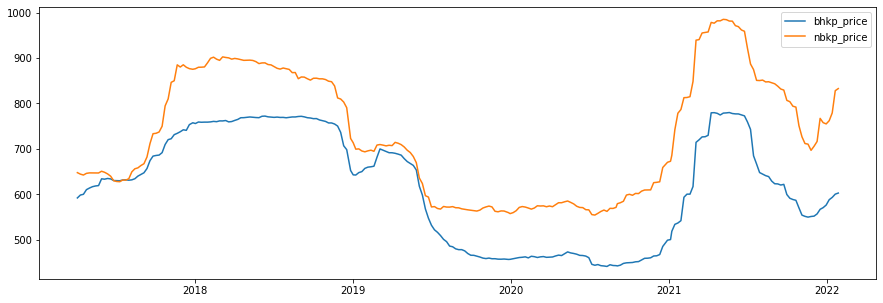

In [90]:
plt.figure(figsize=(15,5))
plt.plot(df['date'],df['bhkp_price'],label='bhkp_price');
plt.plot(df['date'],df['nbkp_price'],label='nbkp_price');
plt.legend(loc='best');

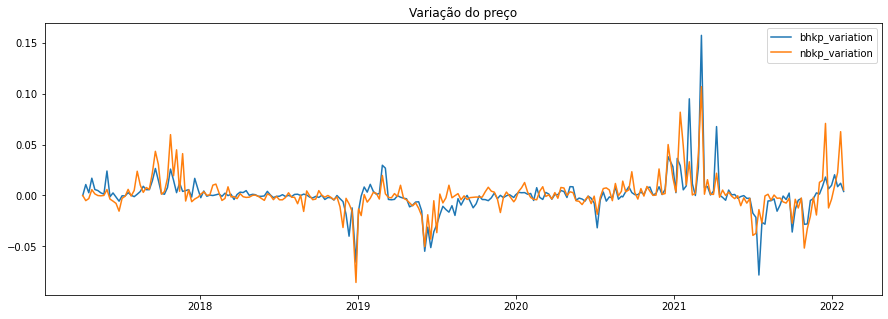

In [91]:
plt.figure(figsize=(15,5))
plt.title("Variação do preço" )
plt.plot(df['date'],df['bhkp_variation'],label='bhkp_variation');
plt.plot(df['date'],df['nbkp_variation'],label='nbkp_variation');
plt.legend(loc='best');


In [92]:
#https://seaborn.pydata.org/generated/seaborn.histplot.html
plt.figure(figsize=(15,4))
# sns.histplot(data = df, x = 'bhkp_wow_variation', color='b', kde=True); #bins=auto
# sns.histplot(data = df, x = 'nbkp_wow_variation', color='orange', kde=True ); # bins=20

<Figure size 1080x288 with 0 Axes>

<Figure size 1080x288 with 0 Axes>

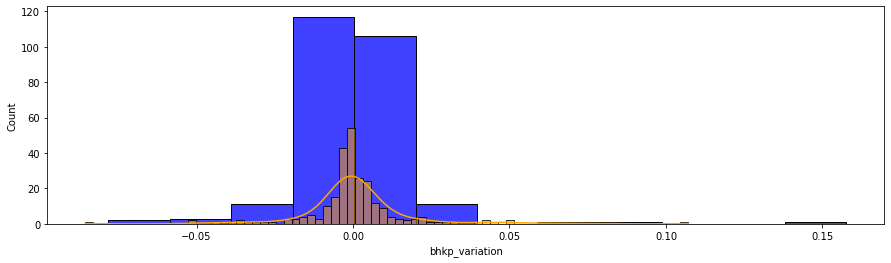

In [93]:
plt.figure(figsize=(15,4))
sns.histplot(data = df, x = 'bhkp_variation', color='b', bins=12); #bins=auto
sns.histplot(data = df, x = 'nbkp_variation', color='orange', kde=True ); # bins=20

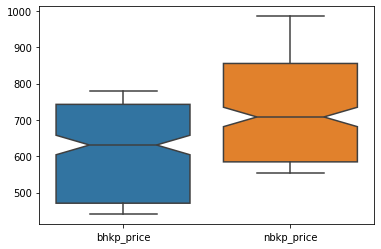

In [94]:
# plt.figure(figsize=(15,4))
sns.boxplot(data = df[['bhkp_price','nbkp_price']], notch = True);

In [95]:
print(df.shape)
df[['bhkp_variation','bhkp_variation']].head()

(253, 9)


,bhkp_variation,bhkp_variation
0,0.000000,0.000000
1,0.010792,0.010792
2,0.002690,0.002690
3,0.017014,0.017014
4,0.005882,0.005882


In [96]:
df[['bhkp_variation','bhkp_variation']].describe()

,bhkp_variation,bhkp_variation
count,253.000000,253.000000
mean,0.000231,0.000231
std,0.018161,0.018161
min,-0.078251,-0.078251
25%,-0.003672,-0.003672
50%,0.000084,0.000084
75%,0.003820,0.003820
max,0.157578,0.157578


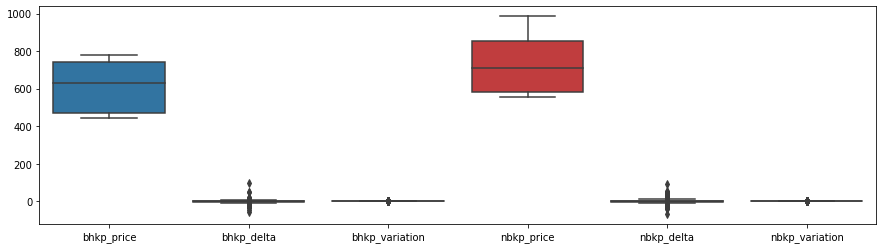

In [97]:
plt.figure(figsize=(15,4))
sns.boxplot(data = df[['bhkp_price', 'bhkp_delta', 'bhkp_variation', 'nbkp_price', 'nbkp_delta', 'nbkp_variation']] ,  );

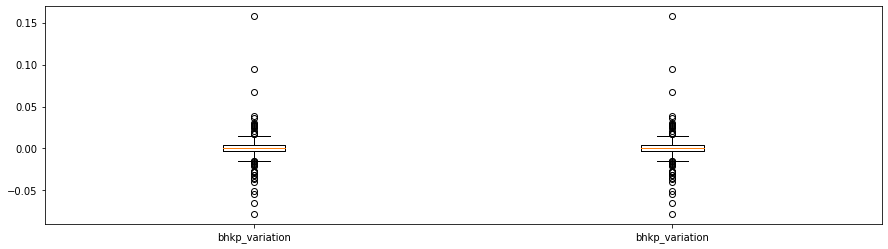

In [98]:
plt.figure(figsize=(15,4))
data = [df['bhkp_variation'], df['bhkp_variation']]
plt.boxplot(x = data , labels=['bhkp_variation','bhkp_variation']);

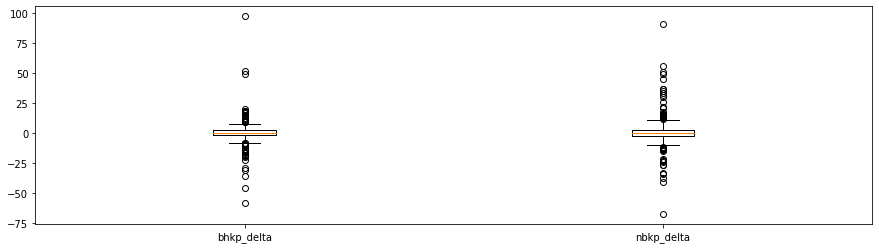

In [99]:
plt.figure(figsize=(15,4))
data = [df['bhkp_delta'], df['nbkp_delta']]
plt.boxplot(x = data , labels=['bhkp_delta','nbkp_delta']);

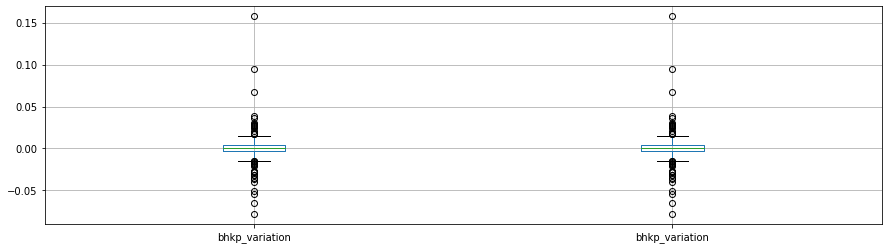

In [100]:
plt.figure(figsize=(15,4))
# sns.boxplot(data = df[['bhkp_variation','bhkp_variation']] );

df.boxplot(column=['bhkp_variation', 'bhkp_variation']) ;


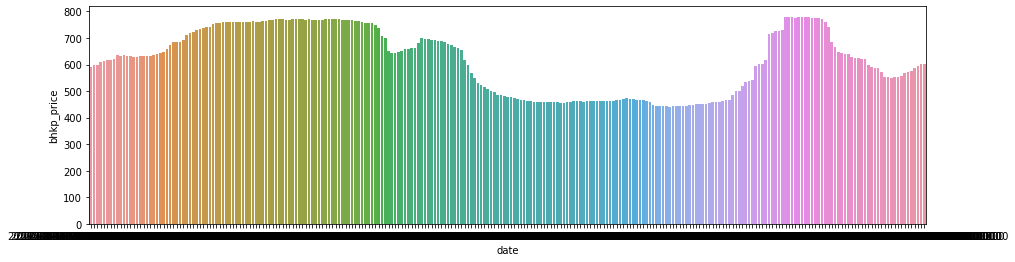

In [101]:
plt.figure(figsize=(15,4))
sns.barplot(x="date", y="bhkp_price", data=df);

# Testes Normalidade
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [102]:
from scipy.stats import *

data1 = df[['bhkp_variation']].values
data2 = df[['nbkp_variation']].values

In [103]:
def run_tests():
    tests = [shapiro, normaltest, anderson, pearsonr, spearmanr, kendalltau, ttest_ind, 
             ttest_rel, f_oneway, mannwhitneyu, wilcoxon, kruskal, friedmanchisquare, chi2_contingency]
    for t in tests:
        try:
            stat, p = t(data1)
            print(f'{t} - stat=%.3f, p=%.3f' % (stat, p))
        except Exception as e:
            try:
                stat, p = t(data1, data2)
                print(f'{t} - stat=%.3f, p=%.3f' % (stat, p))
            except Exception as e2:
                print(f'{t} FAILED - {e2}')
        
run_tests()

<function shapiro at 0x000001EABC681820> - stat=0.671, p=0.000
<function normaltest at 0x000001EABC649670> - stat=197.273, p=0.000
<function anderson at 0x000001EABC684040> FAILED - Invalid distribution; dist must be 'norm', 'expon', 'gumbel', 'extreme1' or 'logistic'.
<function pearsonr at 0x000001EABC651310> FAILED - shapes (253,1) and (253,1) not aligned: 1 (dim 1) != 253 (dim 0)
<function spearmanr at 0x000001EABC651820> - stat=0.622, p=0.000
<function kendalltau at 0x000001EABC658160> - stat=0.460, p=0.000
<function ttest_ind at 0x000001EABC65ADC0> - stat=-0.574, p=0.566
<function ttest_rel at 0x000001EABC65C280> - stat=-1.079, p=0.282
<function f_oneway at 0x000001EABC651160> - stat=0.329, p=0.566
<function mannwhitneyu at 0x000001EABC73F430> - stat=32623.000, p=0.707
<function wilcoxon at 0x000001EABC68BB80> FAILED - Samples x and y must be one-dimensional.
<function kruskal at 0x000001EABC662A60> FAILED - Samples must be one-dimensional.
<function friedmanchisquare at 0x000001E

C:\Development\FK\ITA_Tese\.env-win-tese\lib\site-packages\scipy\stats\morestats.py:1854: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if dist not in ['norm', 'expon', 'gumbel', 'gumbel_l',


In [104]:
# stat, p, dof, expected = chi2_contingency([data1, data2])
# print('stat=%.3f, p=%.3f' % (stat, p))

# Categorização


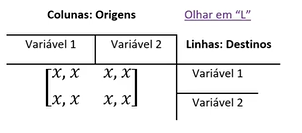

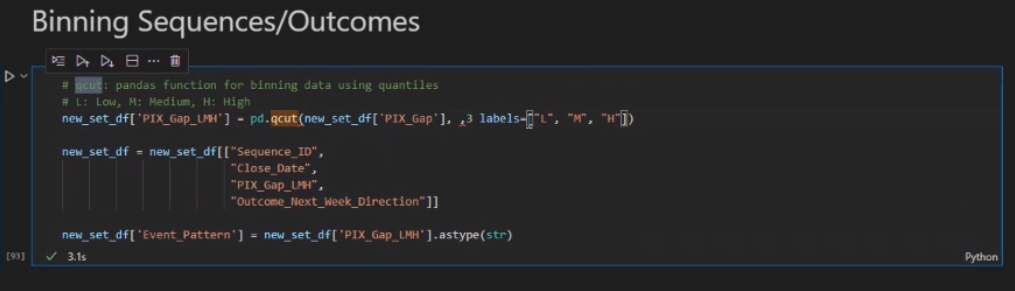

https://pandas.pydata.org/docs/reference/api/pandas.qcut.html


## Support

In [105]:
get_divison = lambda size: [item / size for item in list(range(size + 1))]
get_labels = lambda size: [chr(item + 65) for item in list(range(size))]

get_full = lambda size: [ (chr(i + 65), f'{j / size} < x <= { (j+1) / size}' ) for i , j in enumerate(range(size))]

get_bins = lambda _input_array, size:  np.round(np.linspace(_input_array.min(), _input_array.max(), size + 1), 6).tolist()

print(get_divison(5))
print(get_labels(5))
print(get_full(5))

print( get_bins( df['bhkp_price'].values, 5) )

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
['A', 'B', 'C', 'D', 'E']
[('A', '0.0 < x <= 0.2'), ('B', '0.2 < x <= 0.4'), ('C', '0.4 < x <= 0.6'), ('D', '0.6 < x <= 0.8'), ('E', '0.8 < x <= 1.0')]
[441.26, 509.026, 576.792, 644.558, 712.324, 780.09]


In [106]:
 np.round( np.linspace(start=0, stop=1, num= 5 + 1, dtype='float64', ), 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [107]:
pd.interval_range(start=0, end=1, periods=5)

IntervalIndex([(0.0, 0.2], (0.2, 0.4], (0.4, 0.6000000000000001], (0.6000000000000001, 0.8], (0.8, 1.0]], dtype='interval[float64, right]')

In [108]:
np.arange(0, 1.01, .2)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [109]:
arr = [20, 2, 7, 1, 34]
print("Q2 quantile of arr : ", np.quantile(arr, .50))
print("Q1 quantile of arr : ", np.quantile(arr, .25))
print("Q3 quantile of arr : ", np.quantile(arr, .75))
print("100th quantile of arr : ", np.quantile(arr, .1))

Q2 quantile of arr :  7.0
Q1 quantile of arr :  2.0
Q3 quantile of arr :  20.0
100th quantile of arr :  1.4


In [110]:
def group_categories_by_sequence(df, cat):
    all = []  # full list
    lst = []  # each quantile
    last = ''
    for z in zip(df[cat], df[cat]):
        if z[1] != last:  # next quantile
            all.append(lst)
            lst = [z[0]]  # start new list
            last = z[1]
        else:
            lst.append(z[0])  # same quantile


    all.append(lst)  # final quantile
    del all[0]  # remove blank
    
    return all
    


In [111]:
def print_categories(df, cat, ref):
    for item in sorted(list(df[cat].unique())):
        print( str(format(df[df[cat] == item][ref].min(), '.8f')).rjust(12), \
              f" < {item} <= ".center(12), \
               str(format(df[df[cat] == item][ref].max(), '.8f')).rjust(12) )

# print_categories(df, 'bhkp_variation_cat', 'bhkp_variation')

In [112]:
def print_categories_v2(pd_serie: pd.core.series.Series):
    for item in sorted(cut_series.unique()):
        #print(type(item) , item, item.left)
        #print(str( item.left).rjust(12) )
        print(item)
        
# print_categories(cut_series)    

In [113]:
def print_categories_v3(arr: np.ndarray, labeled = False):
    arr = np.round(arr, 6)
    for i in range(0, len(arr) - 1):
        print(str(arr[i]).rjust(12), \
              f" < x <= ".center(8) if labeled == False else f" < {chr(i + 65)} <= ".center(8), \
              str(arr[i + 1]).rjust(12) )
        
# print_categories_v3(cut_intervals, True)

## pd.qcut
Divisão pelos quartis

In [114]:
pd.qcut(df['bhkp_price'], 3, labels=['L','M','H']).head(3)

0    M
1    M
2    M
Name: bhkp_price, dtype: category
Categories (3, object): ['L' < 'M' < 'H']

In [115]:
df.groupby( pd.qcut(df['bhkp_price'], q = get_divison(5) ) ).count()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
bhkp_price,,,,,,,,,
"(441.259, 464.484]",51,51,51,51,51,51,51,51,51
"(464.484, 593.048]",50,50,50,50,50,50,50,50,50
"(593.048, 660.92]",51,51,51,51,51,51,51,51,51
"(660.92, 759.398]",50,50,50,50,50,50,50,50,50
"(759.398, 780.09]",51,51,51,51,51,51,51,51,51


In [116]:
df.groupby( pd.qcut(df['bhkp_price'], get_divison(5), labels=get_labels(5)) ).count()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
bhkp_price,,,,,,,,,
A,51,51,51,51,51,51,51,51,51
B,50,50,50,50,50,50,50,50,50
C,51,51,51,51,51,51,51,51,51
D,50,50,50,50,50,50,50,50,50
E,51,51,51,51,51,51,51,51,51


In [117]:
 df.groupby( pd.cut(df['bhkp_price'], bins = get_bins( df['bhkp_price'].values, 5), labels=get_labels(5) ) ).count()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
bhkp_price,,,,,,,,,
A,75,75,75,75,75,75,75,75,75
B,20,20,20,20,20,20,20,20,20
C,46,46,46,46,46,46,46,46,46
D,34,34,34,34,34,34,34,34,34
E,77,77,77,77,77,77,77,77,77


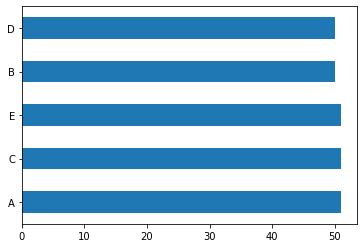

In [118]:
size = 5
pd.qcut(df['bhkp_price'], q = size, labels=get_labels(size) ).value_counts().plot(kind='barh')
plt.show()

In [119]:
pd.qcut(df['bhkp_price'], get_divison(5), labels= get_labels(5)).unique()
# sorted(qc.unique())

['B', 'C', 'D', 'E', 'A']
Categories (5, object): ['A' < 'B' < 'C' < 'D' < 'E']

In [120]:
qc = pd.qcut(df['bhkp_price'], [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
qc.head()

0    (505.88, 593.048]
1    (593.048, 631.14]
2    (593.048, 631.14]
3    (593.048, 631.14]
4    (593.048, 631.14]
Name: bhkp_price, dtype: category
Categories (10, interval[float64, right]): [(441.259, 458.382] < (458.382, 464.484] < (464.484, 505.88] < (505.88, 593.048] ... (660.92, 716.708] < (716.708, 759.398] < (759.398, 769.442] < (769.442, 780.09]]

## pd.cut

In [121]:
get_bins( df['bhkp_price'].values, 5)

[441.26, 509.026, 576.792, 644.558, 712.324, 780.09]

In [122]:
 df.groupby( pd.cut(df['bhkp_price'], bins = 5 ) ).count()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
bhkp_price,,,,,,,,,
"(440.921, 509.026]",76,76,76,76,76,76,76,76,76
"(509.026, 576.792]",20,20,20,20,20,20,20,20,20
"(576.792, 644.558]",46,46,46,46,46,46,46,46,46
"(644.558, 712.324]",34,34,34,34,34,34,34,34,34
"(712.324, 780.09]",77,77,77,77,77,77,77,77,77


In [123]:
 df.groupby( pd.cut(df['bhkp_price'], bins = get_bins( df['bhkp_price'].values, 5) ) ).count()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation
bhkp_price,,,,,,,,,
"(441.26, 509.026]",75,75,75,75,75,75,75,75,75
"(509.026, 576.792]",20,20,20,20,20,20,20,20,20
"(576.792, 644.558]",46,46,46,46,46,46,46,46,46
"(644.558, 712.324]",34,34,34,34,34,34,34,34,34
"(712.324, 780.09]",77,77,77,77,77,77,77,77,77


In [124]:
cut_series, cut_intervals = pd.cut(df['bhkp_price'], bins = 3, retbins=True )

print("Cut series:")
print(cut_series.head())
print("")
print(type(cut_series.unique()) )
print("Cut intervals: ", np.round(cut_intervals,2) )

Cut series:
0    (554.203, 667.147]
1    (554.203, 667.147]
2    (554.203, 667.147]
3    (554.203, 667.147]
4    (554.203, 667.147]
Name: bhkp_price, dtype: category
Categories (3, interval[float64, right]): [(440.921, 554.203] < (554.203, 667.147] < (667.147, 780.09]]

<class 'pandas.core.arrays.categorical.Categorical'>
Cut intervals:  [440.92 554.2  667.15 780.09]


In [125]:
print_categories_v2(cut_series)

(440.921, 554.203]
(554.203, 667.147]
(667.147, 780.09]


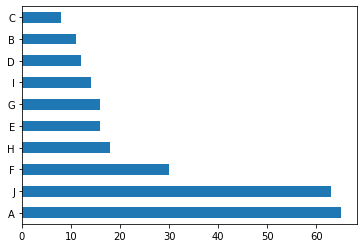

In [126]:
bins = 10
pd.cut(df['bhkp_price'], bins = bins, labels=get_labels(bins) ).value_counts().plot(kind='barh')
plt.show()

## Categoriacao do preço  / qcut

In [127]:
df['bhkp_price_cat'] = pd.qcut( df['bhkp_price'], get_divison(5), labels= get_labels(5) )

In [128]:
categories_grouped = group_categories_by_sequence(df, 'bhkp_price_cat')
print(categories_grouped)

[['B'], ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'], ['E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E'], ['D', 'D', 'D', 'D', 'D', 'D', 'D'], ['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'], ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'], ['C', 'C', 'C'], ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['B', 'B', 'B',

In [129]:
df.head()

,date,year,week,bhkp_price,bhkp_delta,bhkp_variation,nbkp_price,nbkp_delta,nbkp_variation,bhkp_price_cat
0,2017-04-04,2017,14,592.08,0.00,0.000000,647.76,0.00,0.000000,B
1,2017-04-11,2017,15,598.47,6.39,0.010792,644.48,-3.28,-0.005064,C
2,2017-04-18,2017,16,600.08,1.61,0.002690,642.52,-1.96,-0.003041,C
3,2017-04-25,2017,17,610.29,10.21,0.017014,646.20,3.68,0.005727,C
4,2017-05-02,2017,18,613.88,3.59,0.005882,647.22,1.02,0.001578,C


In [130]:
print_categories(df, 'bhkp_price_cat', 'bhkp_price')

441.26000000    < A <=    464.34000000
464.70000000    < B <=    592.08000000
593.29000000    < C <=    660.67000000
661.92000000    < D <=    759.29000000
759.47000000    < E <=    780.09000000


In [131]:
df[df['bhkp_price_cat'] == 'B'].describe()[['bhkp_price','bhkp_delta','bhkp_variation']]

,bhkp_price,bhkp_delta,bhkp_variation
count,50.00000,50.00000,50.000000
mean,515.71160,-1.31000,-0.002121
std,44.08956,9.11229,0.016868
min,464.70000,-30.68000,-0.051261
25%,471.60000,-4.91750,-0.009895
50%,505.04500,-1.35500,-0.002743
75%,551.90000,2.91750,0.005845
max,592.08000,18.26000,0.038142


In [132]:
df.describe()[['bhkp_price','bhkp_delta','bhkp_variation']]

,bhkp_price,bhkp_delta,bhkp_variation
count,253.000000,253.000000,253.000000
mean,616.829051,0.042451,0.000231
std,120.906163,11.403620,0.018161
min,441.260000,-58.140000,-0.078251
25%,471.030000,-2.000000,-0.003672
50%,631.140000,0.040000,0.000084
75%,742.990000,2.200000,0.003820
max,780.090000,97.260000,0.157578


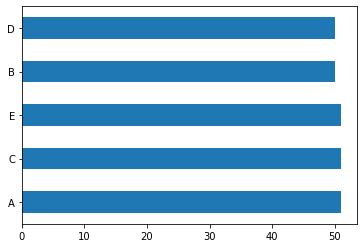

In [133]:
df['bhkp_price_cat'].value_counts().plot(kind='barh')
plt.show()

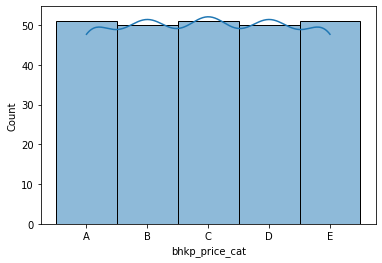

In [134]:
sns.histplot(data=df, x="bhkp_price_cat", kde=True);

## Categoriacao do preço / cut

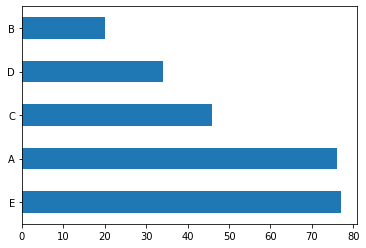

In [135]:
df['bhkp_price_cat2'] = pd.cut( df['bhkp_price'], bins = 5, labels= get_labels(5) )
df['bhkp_price_cat2'].value_counts().plot(kind='barh');


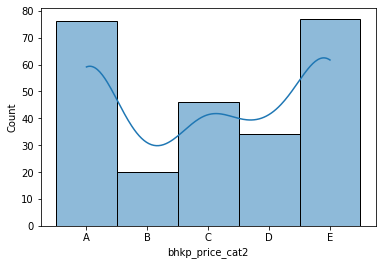

In [136]:
sns.histplot(data=df, x="bhkp_price_cat2", kde=True);

## Categorização pela variação / qcut

In [137]:
df['bhkp_variation_cat'] = pd.qcut( df['bhkp_variation'], get_divison(5), labels= get_labels(5) )

In [138]:
print_categories(df, 'bhkp_variation_cat', 'bhkp_variation')

 -0.07825139    < A <=     -0.00448541
 -0.00445730    < B <=     -0.00104124
 -0.00098694    < C <=      0.00101373
  0.00105389    < D <=      0.00486918
  0.00533110    < E <=      0.15757753


In [139]:
categories_variation_grouped = group_categories_by_sequence(df, 'bhkp_variation_cat')
print(categories_variation_grouped)

[['C'], ['E'], ['D'], ['E', 'E'], ['D', 'D', 'D'], ['E'], ['B'], ['D'], ['B'], ['A'], ['C', 'C'], ['D'], ['C'], ['B'], ['D', 'D'], ['E', 'E', 'E', 'E', 'E', 'E'], ['D', 'D'], ['E', 'E', 'E'], ['D'], ['E'], ['D', 'D'], ['E'], ['B'], ['E', 'E'], ['B'], ['D'], ['C', 'C', 'C', 'C'], ['D'], ['C'], ['D'], ['C'], ['D'], ['B'], ['C'], ['D', 'D', 'D'], ['C'], ['D'], ['C', 'C', 'C', 'C'], ['D'], ['C'], ['B'], ['C', 'C', 'C', 'C', 'C'], ['B'], ['D', 'D'], ['C'], ['D'], ['C'], ['B', 'B'], ['C'], ['B'], ['C'], ['B', 'B', 'B', 'B'], ['C'], ['B'], ['A', 'A', 'A', 'A', 'A', 'A'], ['C'], ['E'], ['D'], ['E'], ['D', 'D', 'D'], ['E', 'E'], ['B', 'B', 'B'], ['C'], ['B', 'B', 'B'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['B'], ['A'], ['B'], ['C'], ['A', 'A', 'A'], ['C'], ['B', 'B'], ['A'], ['B'], ['D'], ['B'], ['C'], ['B'], ['C', 'C'], ['B'], ['C'], ['D', 'D', 'D', 'D', 'D'], ['A'], ['E'], ['B', 'B'], ['D', 'D'], ['B'], ['C', 'C'], ['D', 'D'], ['B'], ['E', 'E'], ['

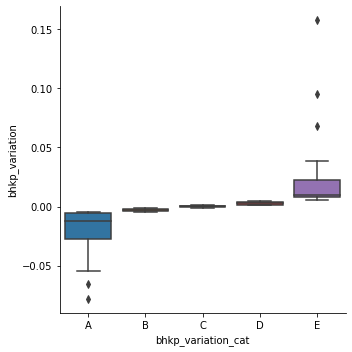

In [140]:
sns.catplot(x="bhkp_variation_cat", y="bhkp_variation", kind="box", data=df);

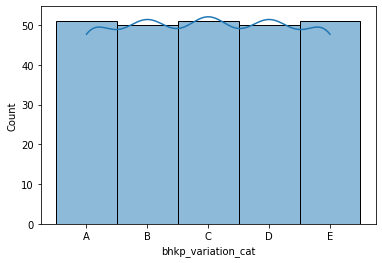

In [141]:
sns.histplot(data=df, x="bhkp_variation_cat", kde=True);

## Categorização pela variação / cut

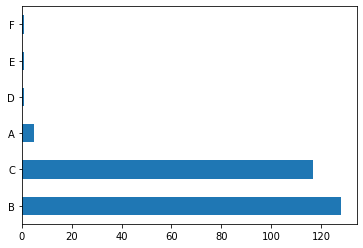

In [142]:
size = 6
df['bhkp_variation_cat2'], cut_intervals = pd.cut( df['bhkp_variation'], bins = size, labels= get_labels(size), retbins=True )
df['bhkp_variation_cat2'].value_counts().plot(kind='barh');

In [143]:
print_categories_v3(cut_intervals, True)


   -0.078487  < A <=     -0.038947
   -0.038947  < B <=      0.000358
    0.000358  < C <=      0.039663
    0.039663  < D <=      0.078968
    0.078968  < E <=      0.118273
    0.118273  < F <=      0.157578


In [144]:
print( get_bins( df['bhkp_variation'].values, 5) )

[-0.078251, -0.031086, 0.01608, 0.063246, 0.110412, 0.157578]


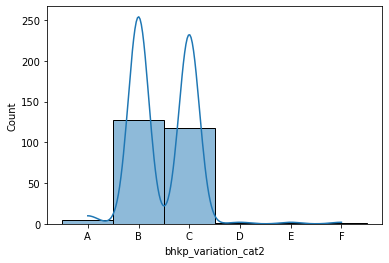

In [145]:
sns.histplot(data=df, x="bhkp_variation_cat2", kde=True);

# Matriz  de Transição

In [147]:
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]
    #del grid_Df.index.name

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)

In [148]:
# df[['bhkp_wow_variation']]

In [170]:
my_list = (df['bhkp_variation'] * 100).to_list()
# my_list
# my_list

In [161]:
# df['bhkp_wow_variation'].to_list()

In [162]:
# max(data1.tolist())[0]

In [178]:
m = transition_matrix(my_list)

TypeError: list indices must be integers or slices, not float

In [190]:
#https://stackoverflow.com/questions/46657221/generating-markov-transition-matrix-in-python/46657489
def transition_matrix(transitions):
    
    n = 1 + int(max(transitions)) #number of states
    log.debug(f'max: {max(transitions)} | n: {n}')
 
    M = [[0]*n for _ in range(n)]
    log.debug(M)

    for (i,j) in zip(transitions, transitions[1:]):
        M[i][j] += 1
        
    log.debug(M)

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M
    


In [198]:
t = [1,1,2,6,8,5,5,7,8,8,1,1,4,5,5,0,0,0,1,1,4,4,5,1,3,3,4,5,4,1,1]
m = transition_matrix(t)
m

DEBUG:__main__:max: 8 | n: 9
DEBUG:__main__:[[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]
DEBUG:__main__:[[2, 1, 0, 0, 0, 0, 0, 0, 0], [0, 4, 1, 1, 2, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 0, 0], [0, 1, 0, 0, 1, 3, 0, 0, 0], [1, 1, 0, 0, 1, 2, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 0, 0, 1]]


[[0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.5, 0.125, 0.125, 0.25, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.2, 0.0, 0.0, 0.2, 0.6, 0.0, 0.0, 0.0],
 [0.16666666666666666,
  0.16666666666666666,
  0.0,
  0.0,
  0.16666666666666666,
  0.3333333333333333,
  0.0,
  0.16666666666666666,
  0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [0.0,
  0.3333333333333333,
  0.0,
  0.0,
  0.0,
  0.3333333333333333,
  0.0,
  0.0,
  0.3333333333333333]]

In [207]:
def transition_matrix_order1(data):
    alphabet = []
    for element in data:
        if element not in alphabet:
            alphabet.append(element)
    alphabet.sort()
    log.debug(alphabet)
    
    previous = data[0]
    matrix = pd.DataFrame(0.0, index=alphabet, columns=alphabet)
    
    for i in data[1:]:
        matrix[i][previous]    += 1.0
        previous = i
    
    total = matrix.sum()
    for element in alphabet:
        matrix[element] = matrix.div(total[element])[element]
    
    return matrix, alphabet

In [219]:
list("ABC")

['A', 'B', 'C']

In [245]:
def transition_matrix_vfk(data):
    log.debug('transition_matrix_vfk')
    size = len(set(data))
    M = [[0]*size for _ in range(size)]
    log.debug(M)
    
    
    def rank(c):
        return ord(c) - ord('A')

    T = [rank(c) for c in  data]
    
    log.debug(T)
    
    matrix = pd.DataFrame(0.0, index=list(set(data)), columns=list(set(data)))
    
    log.debug(data[1:])


    for (i,j) in zip(T,T[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        n = sum(row)
        if n > 0:
            row[:] = [f/sum(row) for f in row]

    #print M:

    for row in M:
        print(row)
        
    return matrix

In [246]:
list_text = ['A', 'B', 'B', 'C', 'B', 'A', 'D', 'D', 'A', 'B', 'A', 'D']

list_text = list("ABCAA")
t1 = transition_matrix_order1(list_text)
print(t1)
print("===" * 10)
t2 = transition_matrix_v1(list_text)
print(t2)

print("===" * 10)
t3 = transition_matrix_vfk(list_text)
print(t3)
t3

DEBUG:__main__:['A', 'B', 'C']
DEBUG:__main__:transition_matrix_vfk
DEBUG:__main__:[[0, 0, 0], [0, 0, 0], [0, 0, 0]]
DEBUG:__main__:[0, 1, 2, 0, 0]
DEBUG:__main__:['B', 'C', 'A', 'A']


(     A    B    C
A  0.5  1.0  0.0
B  0.0  0.0  1.0
C  0.5  0.0  0.0, ['A', 'B', 'C'])
[1, 0, 2]
[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0, 0, 0, 0]
[0, 0, 0, 0]
None
[0.5, 0.5, 0.0]
[0.0, 0.0, 1.0]
[1.0, 0.0, 0.0]
     B    A    C
B  0.0  0.0  0.0
A  0.0  0.0  0.0
C  0.0  0.0  0.0


,B,A,C
B,0.0,0.0,0.0
A,0.0,0.0,0.0
C,0.0,0.0,0.0


In [208]:
transition_matrix_order1(t)

DEBUG:__main__:[0, 1, 2, 3, 4, 5, 6, 7, 8]


(          0      1    2    3    4         5    6    7         8
 0  0.666667  0.125  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000
 1  0.000000  0.500  1.0  0.5  0.4  0.000000  0.0  0.0  0.000000
 2  0.000000  0.000  0.0  0.0  0.0  0.000000  1.0  0.0  0.000000
 3  0.000000  0.000  0.0  0.5  0.2  0.000000  0.0  0.0  0.000000
 4  0.000000  0.125  0.0  0.0  0.2  0.500000  0.0  0.0  0.000000
 5  0.333333  0.125  0.0  0.0  0.2  0.333333  0.0  1.0  0.000000
 6  0.000000  0.000  0.0  0.0  0.0  0.000000  0.0  0.0  0.333333
 7  0.000000  0.000  0.0  0.0  0.0  0.000000  0.0  0.0  0.333333
 8  0.000000  0.125  0.0  0.0  0.0  0.166667  0.0  0.0  0.333333,
 [0, 1, 2, 3, 4, 5, 6, 7, 8])

In [224]:
def transition_matrix_v1(data):
    def rank(c):
        return ord(c) - ord('A')

    T = [rank(c) for c in  data]
    
#     log.debug(T)
    print(T)

    #create matrix of zeros

    M = [[0]*4 for _ in range(4)]

    for (i,j) in zip(T,T[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        n = sum(row)
        if n > 0:
            row[:] = [f/sum(row) for f in row]

    #print M:

    for row in M:
        print(row)

In [205]:
transition_matrix_v1(['A', 'B', 'B', 'C', 'B', 'A', 'D', 'D', 'A', 'B', 'A', 'D'])

DEBUG:__main__:[0, 1, 1, 2, 1, 0, 3, 3, 0, 1, 0, 3]


[0, 1, 1, 2, 1, 0, 3, 3, 0, 1, 0, 3]
[0.0, 0.5, 0.0, 0.5]
[0.5, 0.25, 0.25, 0.0]
[0.0, 1.0, 0.0, 0.0]
[0.5, 0.0, 0.0, 0.5]
